In [1]:
x_origin = 0.002
y_origin = 0
z_origin = 0.006
Lx = 0.009
Ly = 0.01
Lz = 0.011

xmin2 = 0.0065
ymin2 = 0
zmin2 = 0.006
xlength2 = 0.0045
ylength2 = 0.01
zlength2 = 0.011


Box 1 Coordinates:
xmin = 0.002, xmax = 0.011 (deltax: 0.009)
ymin = 0, ymax = 0.01 (deltay: 0.01)
zmin = 0.006, zmax = 0.017 (deltaz: 0.011)

Box 2 Coordinates:
xmin = 0.0065, xmax = 0.011 (deltax: 0.0045)
ymin = 0, ymax = 0.01 (deltay: 0.01)
zmin = 0.006, zmax = 0.017 (deltaz: 0.011)

Box 2 Coordinates:
x0 x1 y0 y1 z0 z1 = Tanh		0.0065	0.011	0	0.01	0.006	0.017	0.0001

Sphere Coordinates:
xc yc zc R w = Tanh	0.002	0.005	0.0115	0.005	0.0001


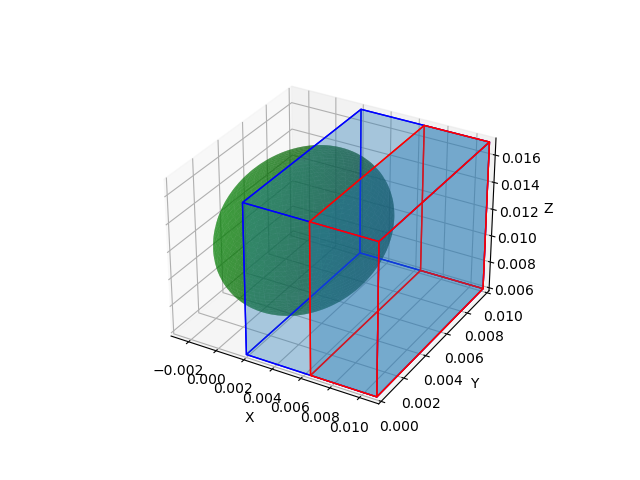

In [2]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
plt.close()
plt.ion()
xcenter_sphere, ycenter_sphere, zcenter_sphere, radius_sphere = 0.002, 0.005, 0.0115, 0.005
# Calculate maximum coordinates for both boxes
xmax1 = x_origin + Lx
ymax1 = y_origin + Ly
zmax1 = z_origin + Lz

xmax2 = xmin2 + xlength2
ymax2 = ymin2 + ylength2
zmax2 = zmin2 + zlength2

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define vertices and edges for both boxes
vertices1 = [
    [x_origin, y_origin, z_origin],
    [xmax1, y_origin, z_origin],
    [xmax1, ymax1, z_origin],
    [x_origin, ymax1, z_origin],
    [x_origin, y_origin, zmax1],
    [xmax1, y_origin, zmax1],
    [xmax1, ymax1, zmax1],
    [x_origin, ymax1, zmax1]
]

vertices2 = [
    [xmin2, ymin2, zmin2],
    [xmax2, ymin2, zmin2],
    [xmax2, ymax2, zmin2],
    [xmin2, ymax2, zmin2],
    [xmin2, ymin2, zmax2],
    [xmax2, ymin2, zmax2],
    [xmax2, ymax2, zmax2],
    [xmin2, ymax2, zmax2]
]

# Define edges for both boxes
edges1 = [
    [vertices1[0], vertices1[1], vertices1[2], vertices1[3]],
    [vertices1[4], vertices1[5], vertices1[6], vertices1[7]],
    [vertices1[0], vertices1[1], vertices1[5], vertices1[4]],
    [vertices1[2], vertices1[3], vertices1[7], vertices1[6]],
    [vertices1[0], vertices1[3], vertices1[7], vertices1[4]],
    [vertices1[1], vertices1[2], vertices1[6], vertices1[5]]
]

edges2 = [
    [vertices2[0], vertices2[1], vertices2[2], vertices2[3]],
    [vertices2[4], vertices2[5], vertices2[6], vertices2[7]],
    [vertices2[0], vertices2[1], vertices2[5], vertices2[4]],
    [vertices2[2], vertices2[3], vertices2[7], vertices2[6]],
    [vertices2[0], vertices2[3], vertices2[7], vertices2[4]],
    [vertices2[1], vertices2[2], vertices2[6], vertices2[5]]
]

# Plot the edges of both boxes
ax.add_collection3d(Poly3DCollection(edges1, edgecolor='b', lw=1, alpha=0.2))
ax.add_collection3d(Poly3DCollection(edges2, edgecolor='r', lw=1, alpha=0.2))

# Create a sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = radius_sphere * np.outer(np.cos(u), np.sin(v)) + xcenter_sphere
y = radius_sphere * np.outer(np.sin(u), np.sin(v)) + ycenter_sphere
z = radius_sphere * np.outer(np.ones(np.size(u)), np.cos(v)) + zcenter_sphere

# Plot the sphere
ax.plot_surface(x, y, z, color='g', alpha=0.5)

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set axis limits
ax.set_xlim([min(x_origin, xmin2, xcenter_sphere - radius_sphere), max(xmax1, xmax2, xcenter_sphere + radius_sphere)])
ax.set_ylim([min(y_origin, ymin2, ycenter_sphere - radius_sphere), max(ymax1, ymax2, ycenter_sphere + radius_sphere)])
ax.set_zlim([min(z_origin, zmin2, zcenter_sphere - radius_sphere), max(zmax1, zmax2, zcenter_sphere + radius_sphere)])

# Display the coordinates and deltas
print("\nBox 1 Coordinates:")
print(f"xmin = {x_origin}, xmax = {xmax1} (deltax: {Lx})")
print(f"ymin = {y_origin}, ymax = {ymax1} (deltay: {Ly})")
print(f"zmin = {z_origin}, zmax = {zmax1} (deltaz: {Lz})")

print("\nBox 2 Coordinates:")
print(f"xmin = {xmin2}, xmax = {xmax2} (deltax: {xlength2})")
print(f"ymin = {ymin2}, ymax = {ymax2} (deltay: {ylength2})")
print(f"zmin = {zmin2}, zmax = {zmax2} (deltaz: {zlength2})")

print("\nBox 2 Coordinates:")
print(f"x0 x1 y0 y1 z0 z1 = Tanh\t\t{xmin2}\t{xmax2}\t{ymin2}\t{ymax2}\t{zmin2}\t{zmax2}\t0.0001")

print("\nSphere Coordinates:")
print(f"xc yc zc R w = Tanh\t{xcenter_sphere}\t{ycenter_sphere}\t{zcenter_sphere}\t{radius_sphere}\t0.0001")
#(Lx/2)+xlength2
# Show the plot
plt.show()